In [140]:
import os
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import torch

from glob import glob
from matplotlib import pyplot as plt
from pprint import pprint
from tqdm import tqdm

In [104]:
matrix = torch.uniform(low=-5, high=5, size=(3, 10))

AttributeError: module 'torch' has no attribute 'uniform'

In [7]:
distribution = torch.distributions.uniform.Uniform(low=-5, high=5, validate_args=None)

In [114]:
matrix = torch.softmax(distribution.sample((5,10)), dim=1)

In [115]:
matrix

tensor([[2.4863e-02, 1.4132e-01, 8.2199e-04, 5.2855e-02, 1.8059e-01, 9.2676e-04,
         4.6859e-01, 7.2675e-02, 3.3356e-02, 2.4000e-02],
        [2.9720e-04, 7.8397e-02, 7.8009e-05, 7.1830e-01, 3.2468e-03, 1.6526e-01,
         1.2391e-03, 3.1203e-02, 1.1599e-04, 1.8632e-03],
        [2.1191e-02, 2.3130e-03, 9.5311e-03, 2.4872e-04, 1.4123e-02, 8.4976e-04,
         9.1950e-01, 2.4360e-02, 7.7433e-03, 1.3559e-04],
        [8.4940e-01, 2.8140e-03, 1.4983e-02, 2.2665e-03, 2.1899e-02, 3.7885e-02,
         2.3422e-02, 9.0015e-04, 3.9438e-02, 6.9938e-03],
        [6.9336e-02, 1.6489e-03, 3.1516e-01, 3.9333e-04, 1.5269e-04, 4.6245e-04,
         2.8809e-01, 2.4767e-04, 1.2761e-02, 3.1176e-01]])

In [116]:
torch.topk(matrix, k=2, dim=1)

(tensor([[0.4686, 0.1806],
         [0.7183, 0.1653],
         [0.9195, 0.0244],
         [0.8494, 0.0394],
         [0.3152, 0.3118]]), tensor([[6, 4],
         [3, 5],
         [6, 7],
         [0, 8],
         [2, 9]]))

In [117]:
values, indices = torch.topk(matrix, k=2, dim=1)

In [118]:
indices

tensor([[6, 4],
        [3, 5],
        [6, 7],
        [0, 8],
        [2, 9]])

In [119]:
tmp = matrix.scatter(1, indices, torch.zeros_like(matrix))

In [120]:
mask = tmp == 0

In [121]:
result = matrix * mask.float()

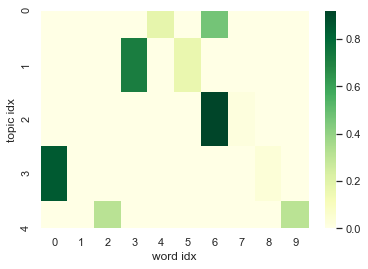

In [138]:
# plt.imshow(result.numpy())
ax = sns.heatmap(result, cmap="YlGn")
ax.set_xlabel("word idx")
ax.set_ylabel("topic idx")
figure = ax.get_figure()
figure.savefig("heatmap")

In [196]:
a = """An essay is, generally, a piece of writing that gives the author's own argument — but the definition is vague, overlapping with those of a paper, an article, a pamphlet, and a short story. Essays have traditionally been sub-classified as formal and informal. Formal essays are characterized by "serious purpose, dignity, logical organization, length," whereas the informal essay is characterized by "the personal element (self-revelation, individual tastes and experiences, confidential manner), humor, graceful style, rambling structure, unconventionality or novelty of theme," etc.[1]

Essays are commonly used as literary criticism, political manifestos, learned arguments, observations of daily life, recollections, and reflections of the author. Almost all modern essays are written in prose, but works in verse have been dubbed essays (e.g., Alexander Pope's An Essay on Criticism and An Essay on Man). While brevity usually defines an essay, voluminous works like John Locke's An Essay Concerning Human Understanding and Thomas Malthus's An Essay on the Principle of Population are counterexamples.

In some countries (e.g., the United States and Canada), essays have become a major part of formal education. Secondary students are taught structured essay formats to improve their writing skills; admission essays are often used by universities in selecting applicants, and in the humanities and social sciences essays are often used as a way of assessing the performance of students during final exams.

The concept of an "essay" has been extended to other media beyond writing. A film essay is a movie that often incorporates documentary filmmaking styles and focuses more on the evolution of a theme or idea. A photographic essay covers a topic with a linked series of photographs that may have accompanying text or captions.""".split(" ")
top_k = 100
width = top_k // 3
letter_counts = Counter(a)
word2idx = {k: i for i, k in enumerate(letter_counts.keys())}
idx2count = {word2idx[k]: v for k, v in letter_counts.items()}
top_k_idx2count = dict(sorted(letter_counts.items(), key=lambda x: x[1], reverse=True)[:top_k])
df = pd.DataFrame.from_dict(top_k_idx2count, orient='index')
ax = df.plot(kind='bar')
ax.tick_params(axis="x", labelsize=10)
figure = ax.get_figure()
figure.set_figheight(10)
figure.set_figwidth(width)
# figure.set_fontsize(4)
figure.subplots_adjust(bottom=0.7)
figure.savefig("top_k_common_topic_word.png", dpi=300)

figure.show()
figure.clf()

/home/lzy/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


<Figure size 2376x720 with 0 Axes>